In [68]:
import os
import tensorflow as tf
import numpy as np
import shutil

print(tf.__version__)

2.5.0-rc2


In [2]:
#create directry, make directory to used save file train and val
directory =['D:/bangkit/ml/tensorflow/projrct final/dataset_private/train',
'D:/bangkit/ml/tensorflow/projrct final/dataset_private/val',
'D:/bangkit/ml/tensorflow/projrct final/dataset_private/train/free',
'D:/bangkit/ml/tensorflow/projrct final/dataset_private/train/occ/',
'D:/bangkit/ml/tensorflow/projrct final/dataset_private/val/free',
'D:/bangkit/ml/tensorflow/projrct final/dataset_private/val/occ']

for d in directory:
    try:
        #mkdir is script create directorym jika berhasil dibuat akan menampilkan pesan succes %name directory, jika sudah ada folder atau gagal akan menampilkan pesan failed
        os.mkdir(d)
        print('success' + d)
    except OSError:
        print('failed')


failed
failed
failed
failed
failed
failed


In [4]:
#split data into directory
#random digunakan untuk membatu shuffle data katika copy data ke directory/split data
import random

def split_train_val(src, training, validation, split_size):
    img = []

    #membaca list/mengambil nama dari file di directory yang akan di split
    for nameFile in os.listdir(src):
        p = src + nameFile
        if os.path.getsize(p):
            img.append(nameFile)
        else:
            print('failed %s' %(fileName))

    sum_img = len(img)
    size = int(sum_img * split_size)
    randoms_size = random.sample(img, sum_img)

    #shuffle data/file dari depan 
    train = randoms_size[:size]
    #shuffle data/file dari belakang/setelah train
    val = randoms_size[size:]

    for i in train:
        #shutil digunakan untuk mencopy file ke dalam directory
        shutil.copyfile(src + i, training + i)
    for i in val:
        shutil.copyfile(src + i, validation + i)

img_free = 'D:/bangkit/ml/tensorflow/projrct final/segmented/free/'
img_occ ='D:/bangkit/ml/tensorflow/projrct final/segmented/occupied/'

dir_train_free = 'D:/bangkit/ml/tensorflow/projrct final/dataset_private/train/free/'
dir_train_occ = 'D:/bangkit/ml/tensorflow/projrct final/dataset_private/train/occ/'

dir_val_free ='D:/bangkit/ml/tensorflow/projrct final/dataset_private/val/free/'
dir_val_occ = 'D:/bangkit/ml/tensorflow/projrct final/dataset_private/val/occ/'

#jumlah data yang akan di split, disini 0.8 untuk file train
split_size = 0.8

split_train_val(img_free, dir_train_free, dir_val_free, split_size)
split_train_val(img_occ, dir_train_occ, dir_val_occ, split_size)

In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
from tensorflow.keras import applications

In [6]:
#transfer Learning Inception
base_model = applications.InceptionV3(weights='imagenet',
                                        include_top=False,
                                        input_shape=(75,75, 3))

#for layer in base_model.layers:
#    layer.trainable = False

base_model.trainable = False

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of bcbd6486424b2319ff4ef7d526e38f63 so we will re-download the data.
87916544/87910968 [==============================] - 37s 0us/step


In [7]:
#directory data
dir_train = 'D:/bangkit/ml/tensorflow/projrct final/dataset_private/train'
dir_val = 'D:/bangkit/ml/tensorflow/projrct final/dataset_private/val'
batch_size = 32
target_size =(75,75)

In [60]:
#add model, disini menggunakan cnn dengan memanfaatkan transfer learning inception
x = base_model.output
x = Flatten()(x)
#bisa ditambahkan dan diatur supaya hasil akurasi sesuai or maksimal tetapi tidak tejadi overvitting
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
predict = Dense(2, activation='softmax')(x)

model = Model(inputs = base_model.input, outputs=predict)

#model.add(base_model)
#model.add(Dropout(0.2))
#model.add(Flatten())
#model.add(Dense(2, activation='softmax'))


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [24]:
#flow_data

train_data = ImageDataGenerator(
    rescale = 1/255.0,
    shear_range =0.2,
    horizontal_flip = True,
    rotation_range = 20,
    height_shift_range=0.1,
    width_shift_range = 0.2,
    )

val_data = ImageDataGenerator(
    rescale = 1/255.0)

train_generate = train_data.flow_from_directory(
    dir_train,
    batch_size = batch_size,
    target_size = target_size,
    class_mode = 'categorical'
)

val_generate = val_data.flow_from_directory(
    dir_val,
    batch_size=batch_size,
    class_mode='categorical',
    target_size=target_size
)

Found 38 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [61]:
# compile model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model.summary()

                
__________________________________________________________________________________________________
batch_normalization_69 (BatchNo (None, 3, 3, 192)    576         conv2d_69[0][0]                  
__________________________________________________________________________________________________
activation_60 (Activation)      (None, 3, 3, 192)    0           batch_normalization_60[0][0]     
__________________________________________________________________________________________________
activation_63 (Activation)      (None, 3, 3, 192)    0           batch_normalization_63[0][0]     
__________________________________________________________________________________________________
activation_68 (Activation)      (None, 3, 3, 192)    0           batch_normalization_68[0][0]     
__________________________________________________________________________________________________
activation_69 (Activation)      (None, 3, 3, 192)    0           batch_normalization_69[0][0

In [62]:
#training model
history = model.fit(
    train_generate,
    validation_data= val_generate,
    epochs=50,
    verbose=1
)

Epoch 1/50
2/2 [==============================] - 14s 4s/step - loss: 0.9018 - accuracy: 0.5526 - val_loss: 0.7694 - val_accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 1s 656ms/step - loss: 0.8952 - accuracy: 0.4737 - val_loss: 0.7499 - val_accuracy: 0.5000
Epoch 3/50
2/2 [==============================] - 1s 291ms/step - loss: 0.8107 - accuracy: 0.4474 - val_loss: 0.7237 - val_accuracy: 0.5000
Epoch 4/50
2/2 [==============================] - 1s 281ms/step - loss: 0.7671 - accuracy: 0.5789 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 5/50
2/2 [==============================] - 1s 287ms/step - loss: 0.6948 - accuracy: 0.6053 - val_loss: 0.6614 - val_accuracy: 0.5000
Epoch 6/50
2/2 [==============================] - 1s 631ms/step - loss: 0.7721 - accuracy: 0.4737 - val_loss: 0.6303 - val_accuracy: 0.5000
Epoch 7/50
2/2 [==============================] - 1s 323ms/step - loss: 0.8455 - accuracy: 0.5526 - val_loss: 0.6021 - val_accuracy: 0.5000
Epoch 8/50
2/2 [======

<Figure size 432x288 with 0 Axes>

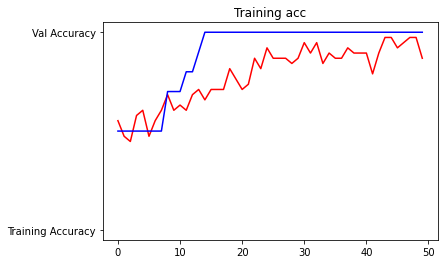

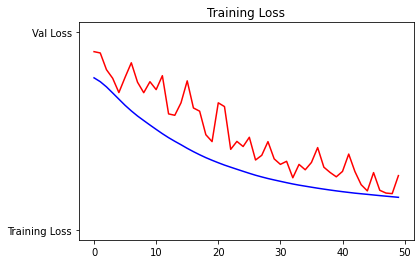

<Figure size 432x288 with 0 Axes>

In [63]:
#visualisasi
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epoch = range(len(acc))

plt.plot(epoch, acc, 'r', "Training Accuracy")
plt.plot(epoch, val_acc, 'b', "Val Accuracy")
plt.title('Training acc')
plt.figure()

plt.plot(epoch, loss, 'r', 'Training Loss')
plt.plot(epoch, val_loss, 'b', 'Val Loss')
plt.title('Training Loss')
plt.figure()



In [65]:
model.save('training1.h5')
# save model to use prediction data